## SI 670 Applied Machine Learning, Week 4:  SVM, Data Leakage. (Due 10/5 11:59pm)

For this assignment, question 1 is worth 50 points, and question 2 and 3 are worth 20 points each, for a total of 90 points. Correct answers and code receive full credit, but partial credit will be awarded if you have the right idea even if your final answers aren't quite right.

Submit your completed notebook file AND corresponding **HTML** file to the Canvas site.

As a reminder, the notebook code you submit must be your own work. Feel free to discuss general approaches to the homework with classmates: if you end up forming more of a team discussion on multiple questions, please include the names of the people you worked with at the top of your notebook file.


### Question 1 (50 points)

Please write the answers as well as your derivation process of the following questions. You can use either LaTeX or python code to represent your answer. For example, if you want to present <$x_1^2$>, in the LaTeX format you should write <(dollar sign) x_1^2 (dollar sign)>; in the python code format you should write <\`x_1\*\*2\`>. See [here](https://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/) for how to represent more mathmatical symbols in LaTeX format.

*Note: The whole question 1 does not require coding.*

#### (a) (10 points) 
The main metric we have been used to measure the quality of regression models is $R^2$, which is defined as, for n data points, $R^2 = 1 -  \frac{\sum_{i=1}^n(\hat{y}_i - y_i)^2}{\sum_{i=1}^n(y_i - \bar{y})^2}$, where $y_i, \hat{y}_i$ are the label and prediction of data point i, and $\bar{y} = \frac{1}{n}\sum_{i=1}^n y_i$. We denote $\frac{1}{n}\sum_{i=1}^n(\hat{y}_i - y_i)^2$ as *Unexplained Variation* and $\frac{1}{n}\sum_{i=1}^n(y_i - \bar{y})^2$ as *Total Variation*. 

Given 5 data points with labels (1, 3, 2, -3, 5, 2) and two classifiers A and B, the predictions of A is (1.1, 1.4, 1.3, -2, 2, 1.1) and the predictions of B is (1.7, 1.3, 0.3, -1, 1.5, 0.3). Please calculate and report the *Unexplained Variation*, *Total Variation*, and *$R^2$* for classifier A and B respectively. 

#### (b) (20 points) 
You are given 3 data points with two features and one labels as follows,

|    X1	| X2 	| Y 	|
|----	|----	|----	|
|   1	|   1 	| 1.05 	|
|   0.7 |  3 	| 0.81 	|
|   2   |  0.5 	| 2.045 |

Suppose you have a linear regression model: $y = w_1 x_1 + w_2 x_2$, please calculate and report the least square error, the L1 regularization, and the L2 regularization terms when

(i) $w_1 = 1, w_2 = 0$

(ii) $w_1 = 1, w_2 = 0.02$

If you set the regularization coefficient $C=1$, which of the above two weights is preferred by the Lasso and which is preferred by Ridge regression? Could you use this example to explain why Lasso prefers sparse models?

#### (c) (20 points) 
One way to create a nonlinear method for regression or classifier is to first transform the feature vector via nonlinear feature map $\Phi: R^d -> R^m$.

* In regression, the nonlinear regression function is: $f(x) = w^T \Phi(x) + b$ where $w \in R^m, b\in R$.

* Inbinary classification, the nonlinear decision function is: $f(x) = w^T \Phi(x) + b$ where $w \in R^m, b \in R$.

Please answer the below question:

(i) Let's first consider the case of scalar input in regression. Assuming we have a nonlinear regression function: $f(x) = a + bx + cx^2 + dx^3 = w^T \Phi(x) + a$ where $x \in R^1$, please answer what's the corresponding $w$, $\Phi(x)$ and $m$ to map the $\Phi: R^1 -> R^m$.

(ii) Now, let's consider the case of binary classification in 2-dim space. Assuming we have a circular classifier to separate the training data (shown in below graph), i.e., $x -> sign{(x^{(1)} - c^{(1)})^2 + (x^{(2)} - c^{(2)})^2} - r^2$ for a certain center $c = [c^{(1)}, c^{(2)}]^T$ and radius r, where $x = [x^{(1)}, x^{(2)}]^T \in R^2$. Consider $\Phi(x) = [(x^{(1)})^2, (x^{(2)})^2, x^{(1)}, x^{(2)}]^T$, what's the corresponding $w$ and $b$ for the linear classifier in the transformed space. 

<img src="si670f20_assn4_q1c.png" style="width: 400px;"/>

#### Answer 1(a)

*Check image for work*

- *Unexplained Variation A*:  **2.31**
- *Unexplained Variation B*:  **4.24**
- *Total Variation*:          **5.89**
- *R^2 classifier A*:         **0.61**
- *R^2 classifier B*:         **0.28**
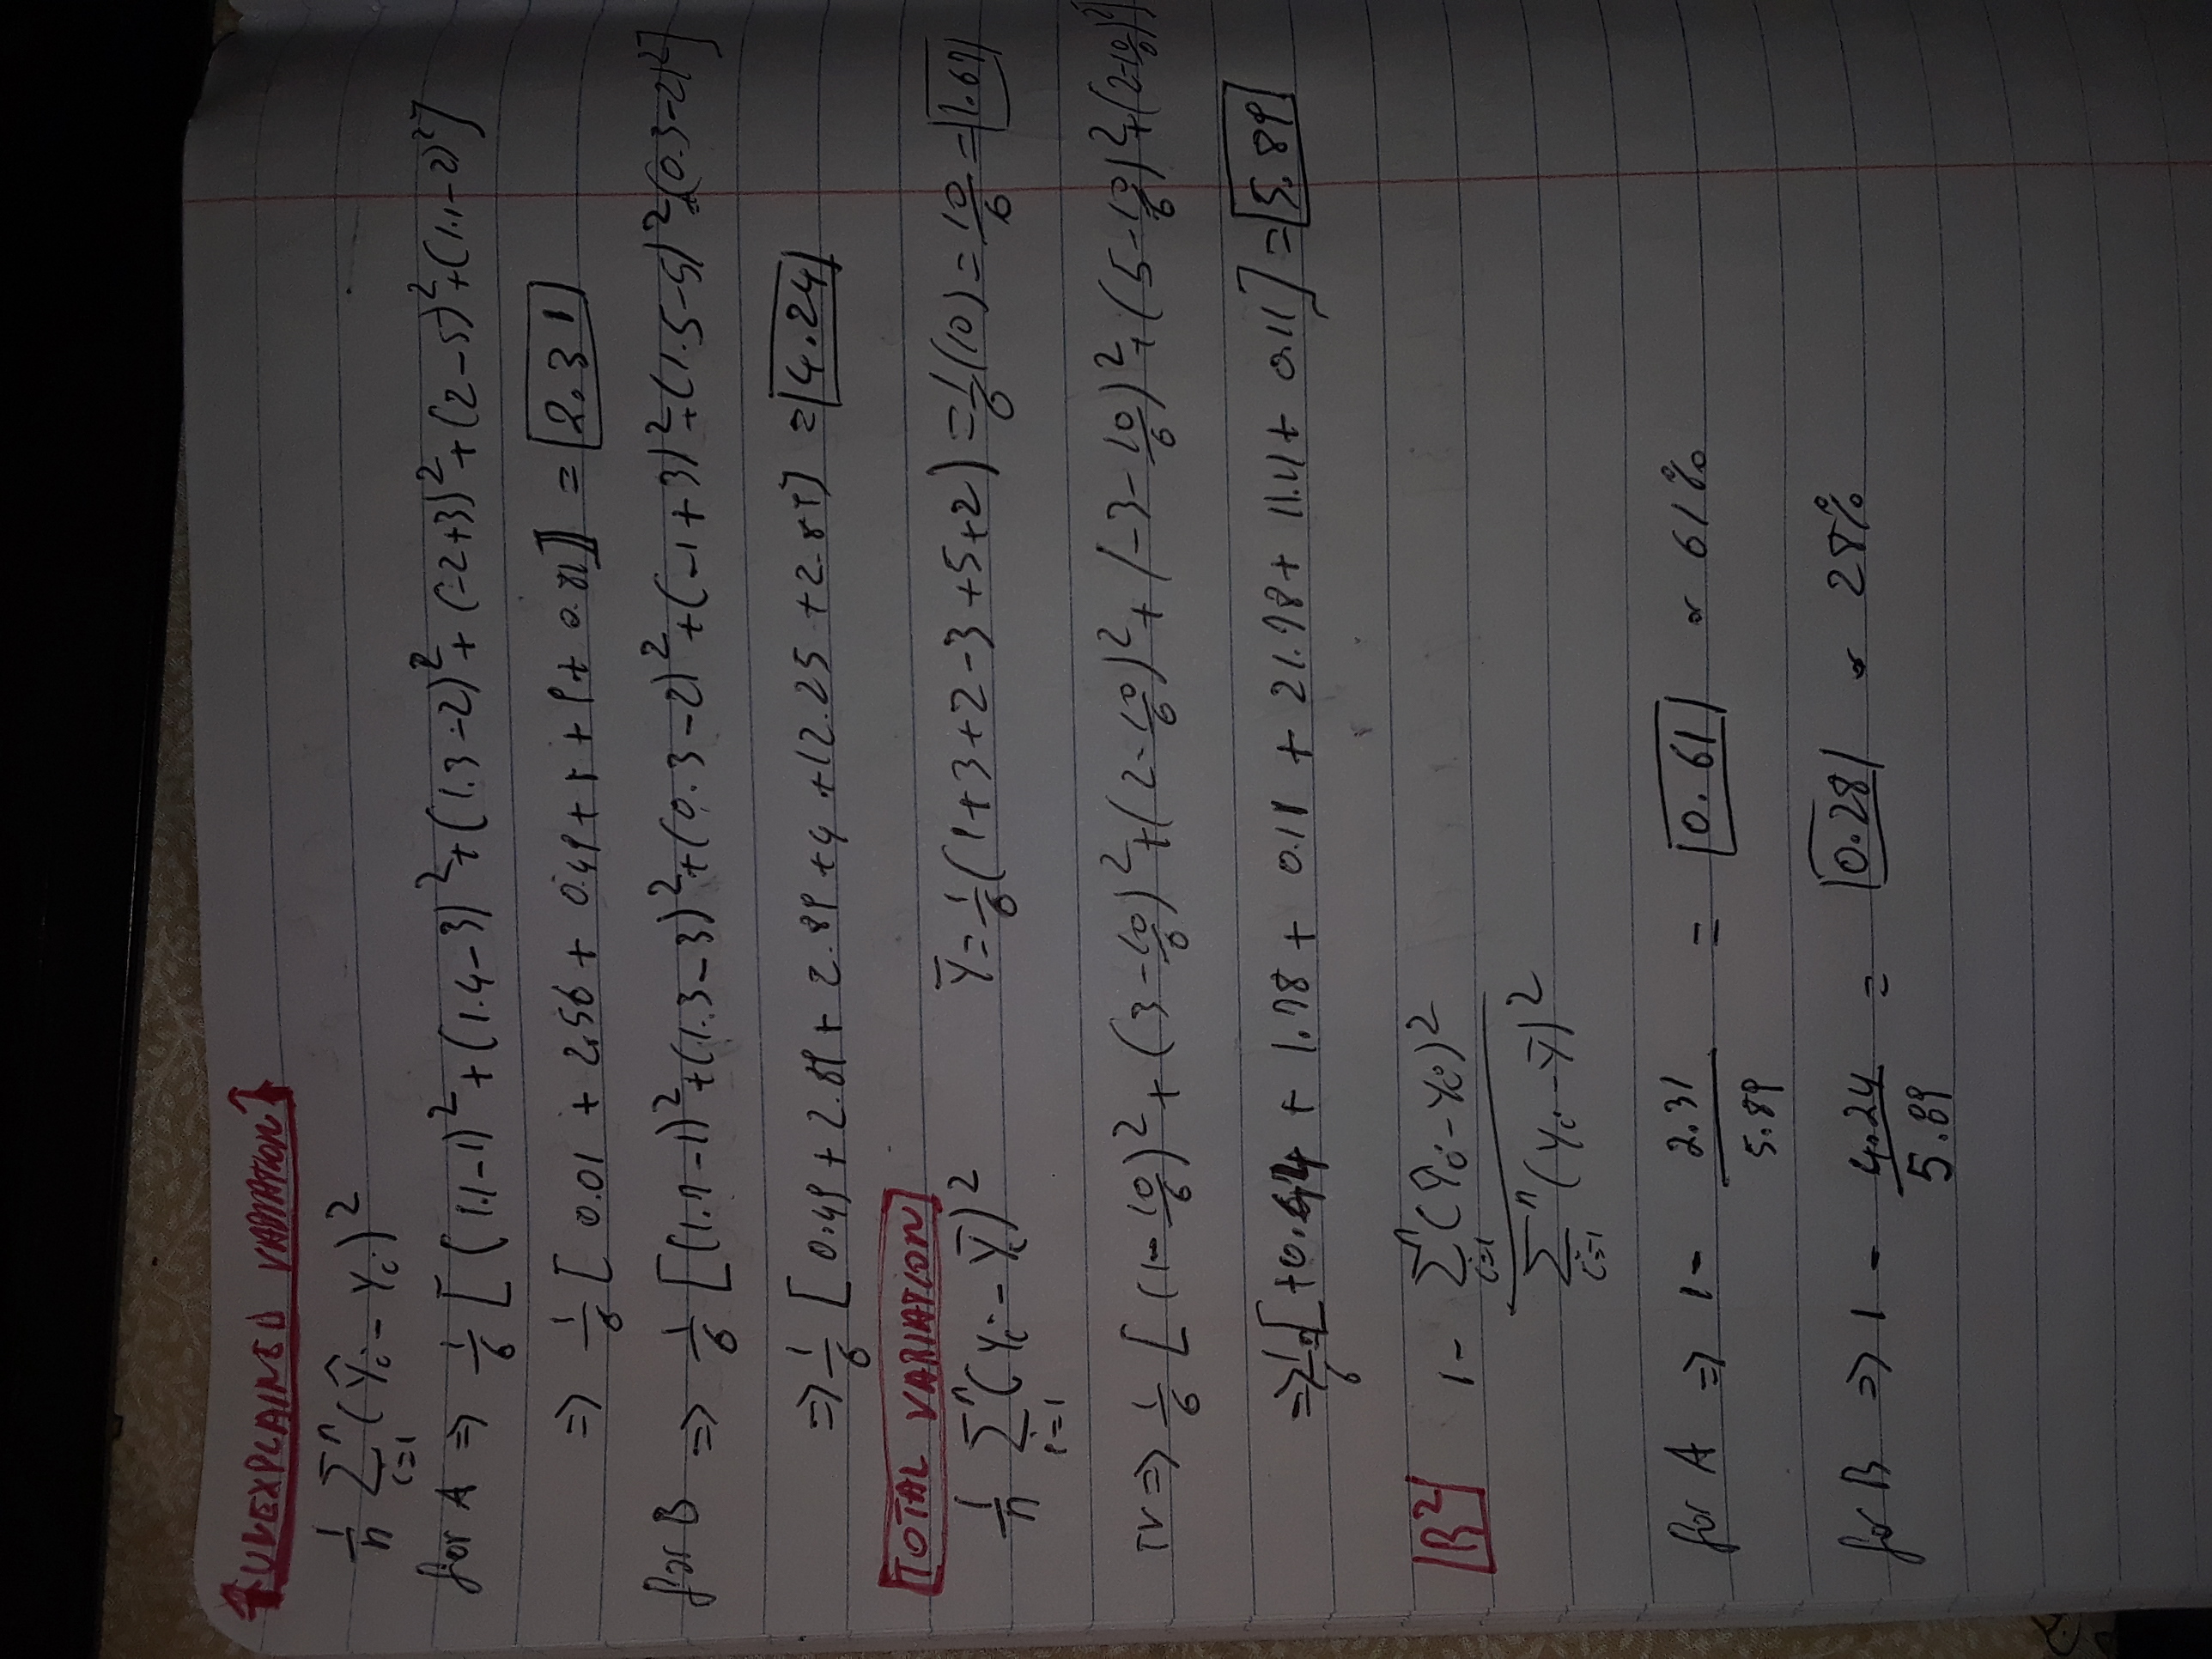

In [10]:
import numpy as np
#Data
y = [1,3,2,-3,5,2]

#Classifiers
a=[1.1, 1.4, 1.3, -2, 2, 1.1]
b= [1.7, 1.3, 0.3, -1, 1.5, 0.3]

#Unexplained variation
uv_a = 0.0
uv_b = 0.0
for x in range(6):
    uv_a += (a[x]-y[x])**2
    uv_b +=(b[x]-y[x])**2
uv_a= uv_a/6
uv_b=uv_b/6
print('Unexplained Variation A: ',round(uv_a,2))
print('Unexplained Variation B: ',round(uv_b,2))

#Total Variation
tv=0.0
y_bar = np.mean(y)
for x in y:
    tv += (x-y_bar)**2
tv=tv/6
print('Total Variation:         ', round(tv,2))

#R^2
Rsquared_a= 1-(uv_a/tv)
Rsquared_b= 1-(uv_b/tv)
print('R^2 classifier A:        ', round(Rsquared_a,2))
print('R^2 classifier B:        ', round(Rsquared_b,2))

Unexplained Variation A:  2.31
Unexplained Variation B:  4.24
Total Variation:          5.89
R^2 classifier A:         0.61
R^2 classifier B:         0.28


#### Answer 1(b)
*Check image for work*

**MSE**
- Model 1: 0.005541667
- Model 2: 0.001541667

**L1 Regularization**
- Model 1: 1
- Model 2: 1.02

**L2 Regularization**
- Model 1: 1
- Model 2: 1.0004

**RSS**
- L1
    - Model 1: 1.005541667
    - Modle 2: 1.021541667
    
- L2
    - Model 1: 1.005541667
    - Model 2: 1.001941667

*L1 regularization* (Lasso) likes better the coefficients from the **first** model (𝑤1=1,𝑤2=0). The first set of coeffiecients produces an RSS of **1.005541667**. 

*L2 regularization* (Ridge) likes better the coefficients from the **second** model(𝑤1=1,𝑤2=0.02 ). The second set of coefficients produces an RSS of **1.001941667**. 

> Overfittining happens when random noise that is present in the model is perceived as something useful. As a result, this noise ends up being incorporated into our model (prediction/inference) leading to poor performance on actual. In order to avoid overfitting, we apply regularization. In the case of L1 9(Lasso) due to its geometric shape (diamond/tilted square) often times irrelevant coefficients will be set to zero. Subsequentally, setting irrelevant coefficients to zero will by default make our data matrix sparse (less populated by noise & unimportantness) leaving only the effect of the few important coefficients. Hence, ensuring sparsity in our training data allows us to not overfit, and eventually perform better on test data. To drive the point home, in our example the second coefficients (w2) is zero in model one, and 0.02 in model two. Now, L1 with coefficient w2=0 does indeed perform better than w2=0.02 due to this decision of setting irrelevant coefficients (w2=0.02) to zero, we are benefitting (smaller RSS) by removing the small effect (or noise) entirely from our model. By setting w2 to zero, we are as well making the model/matrix more sparse.

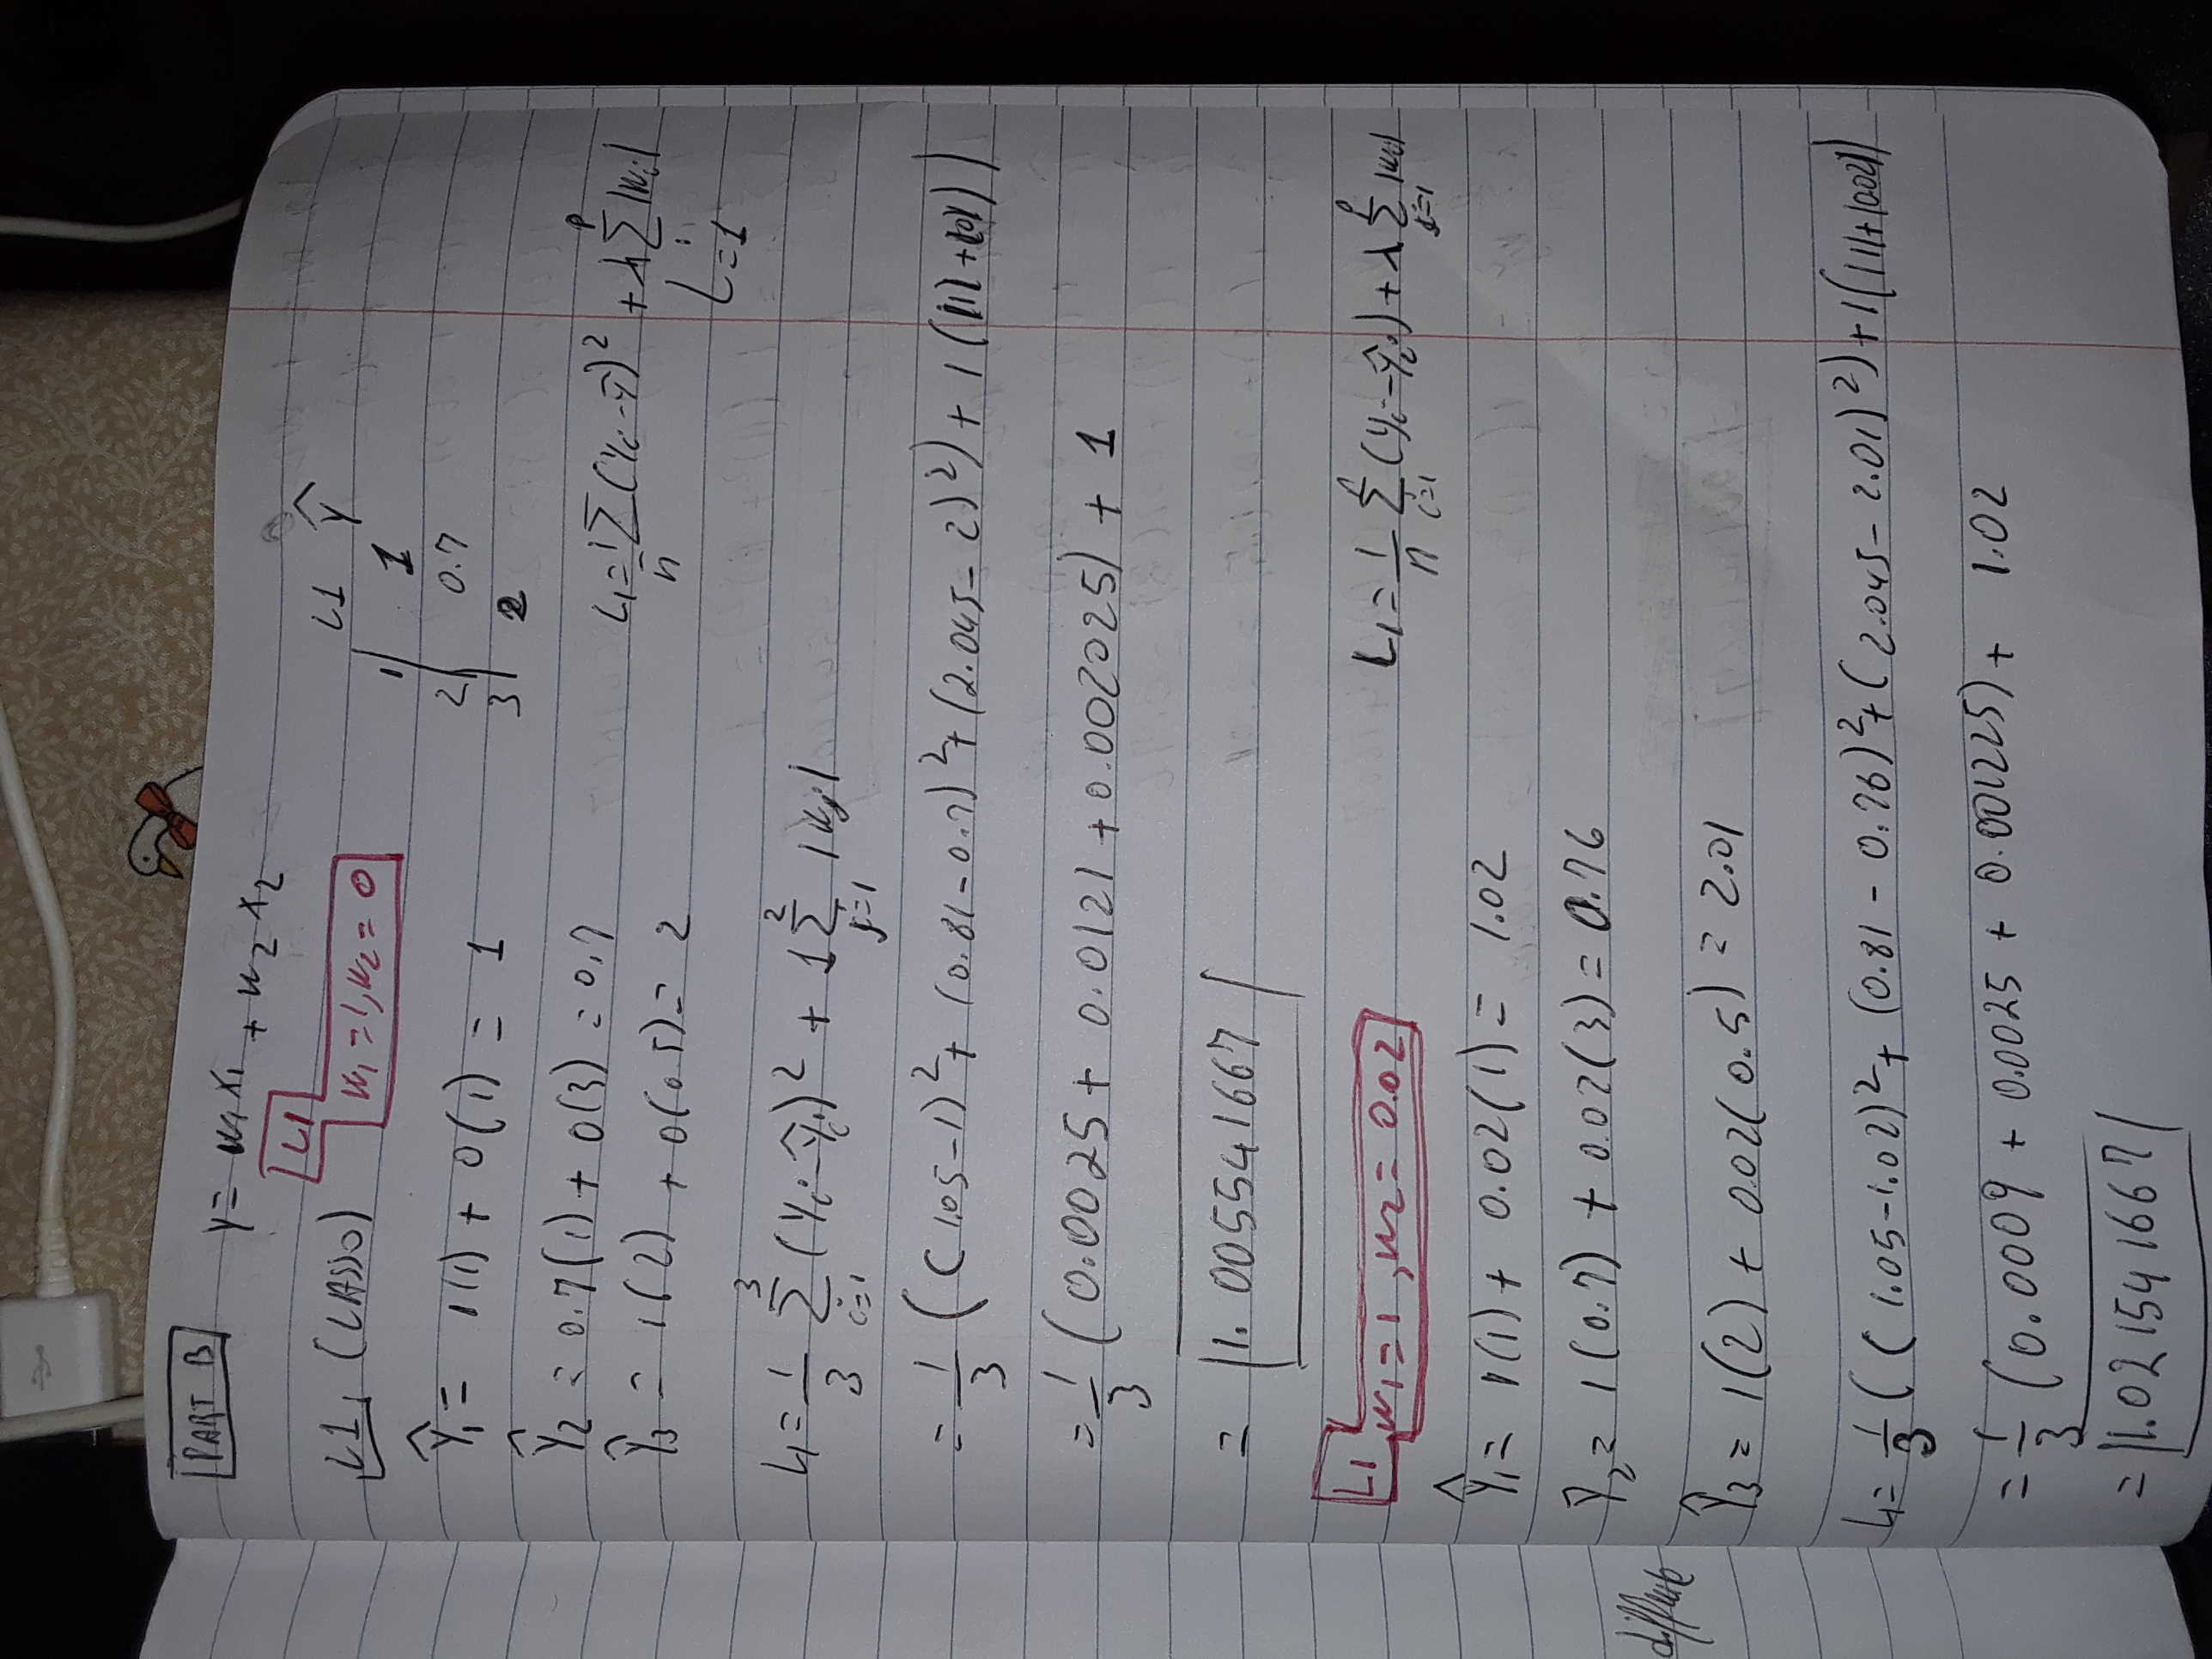

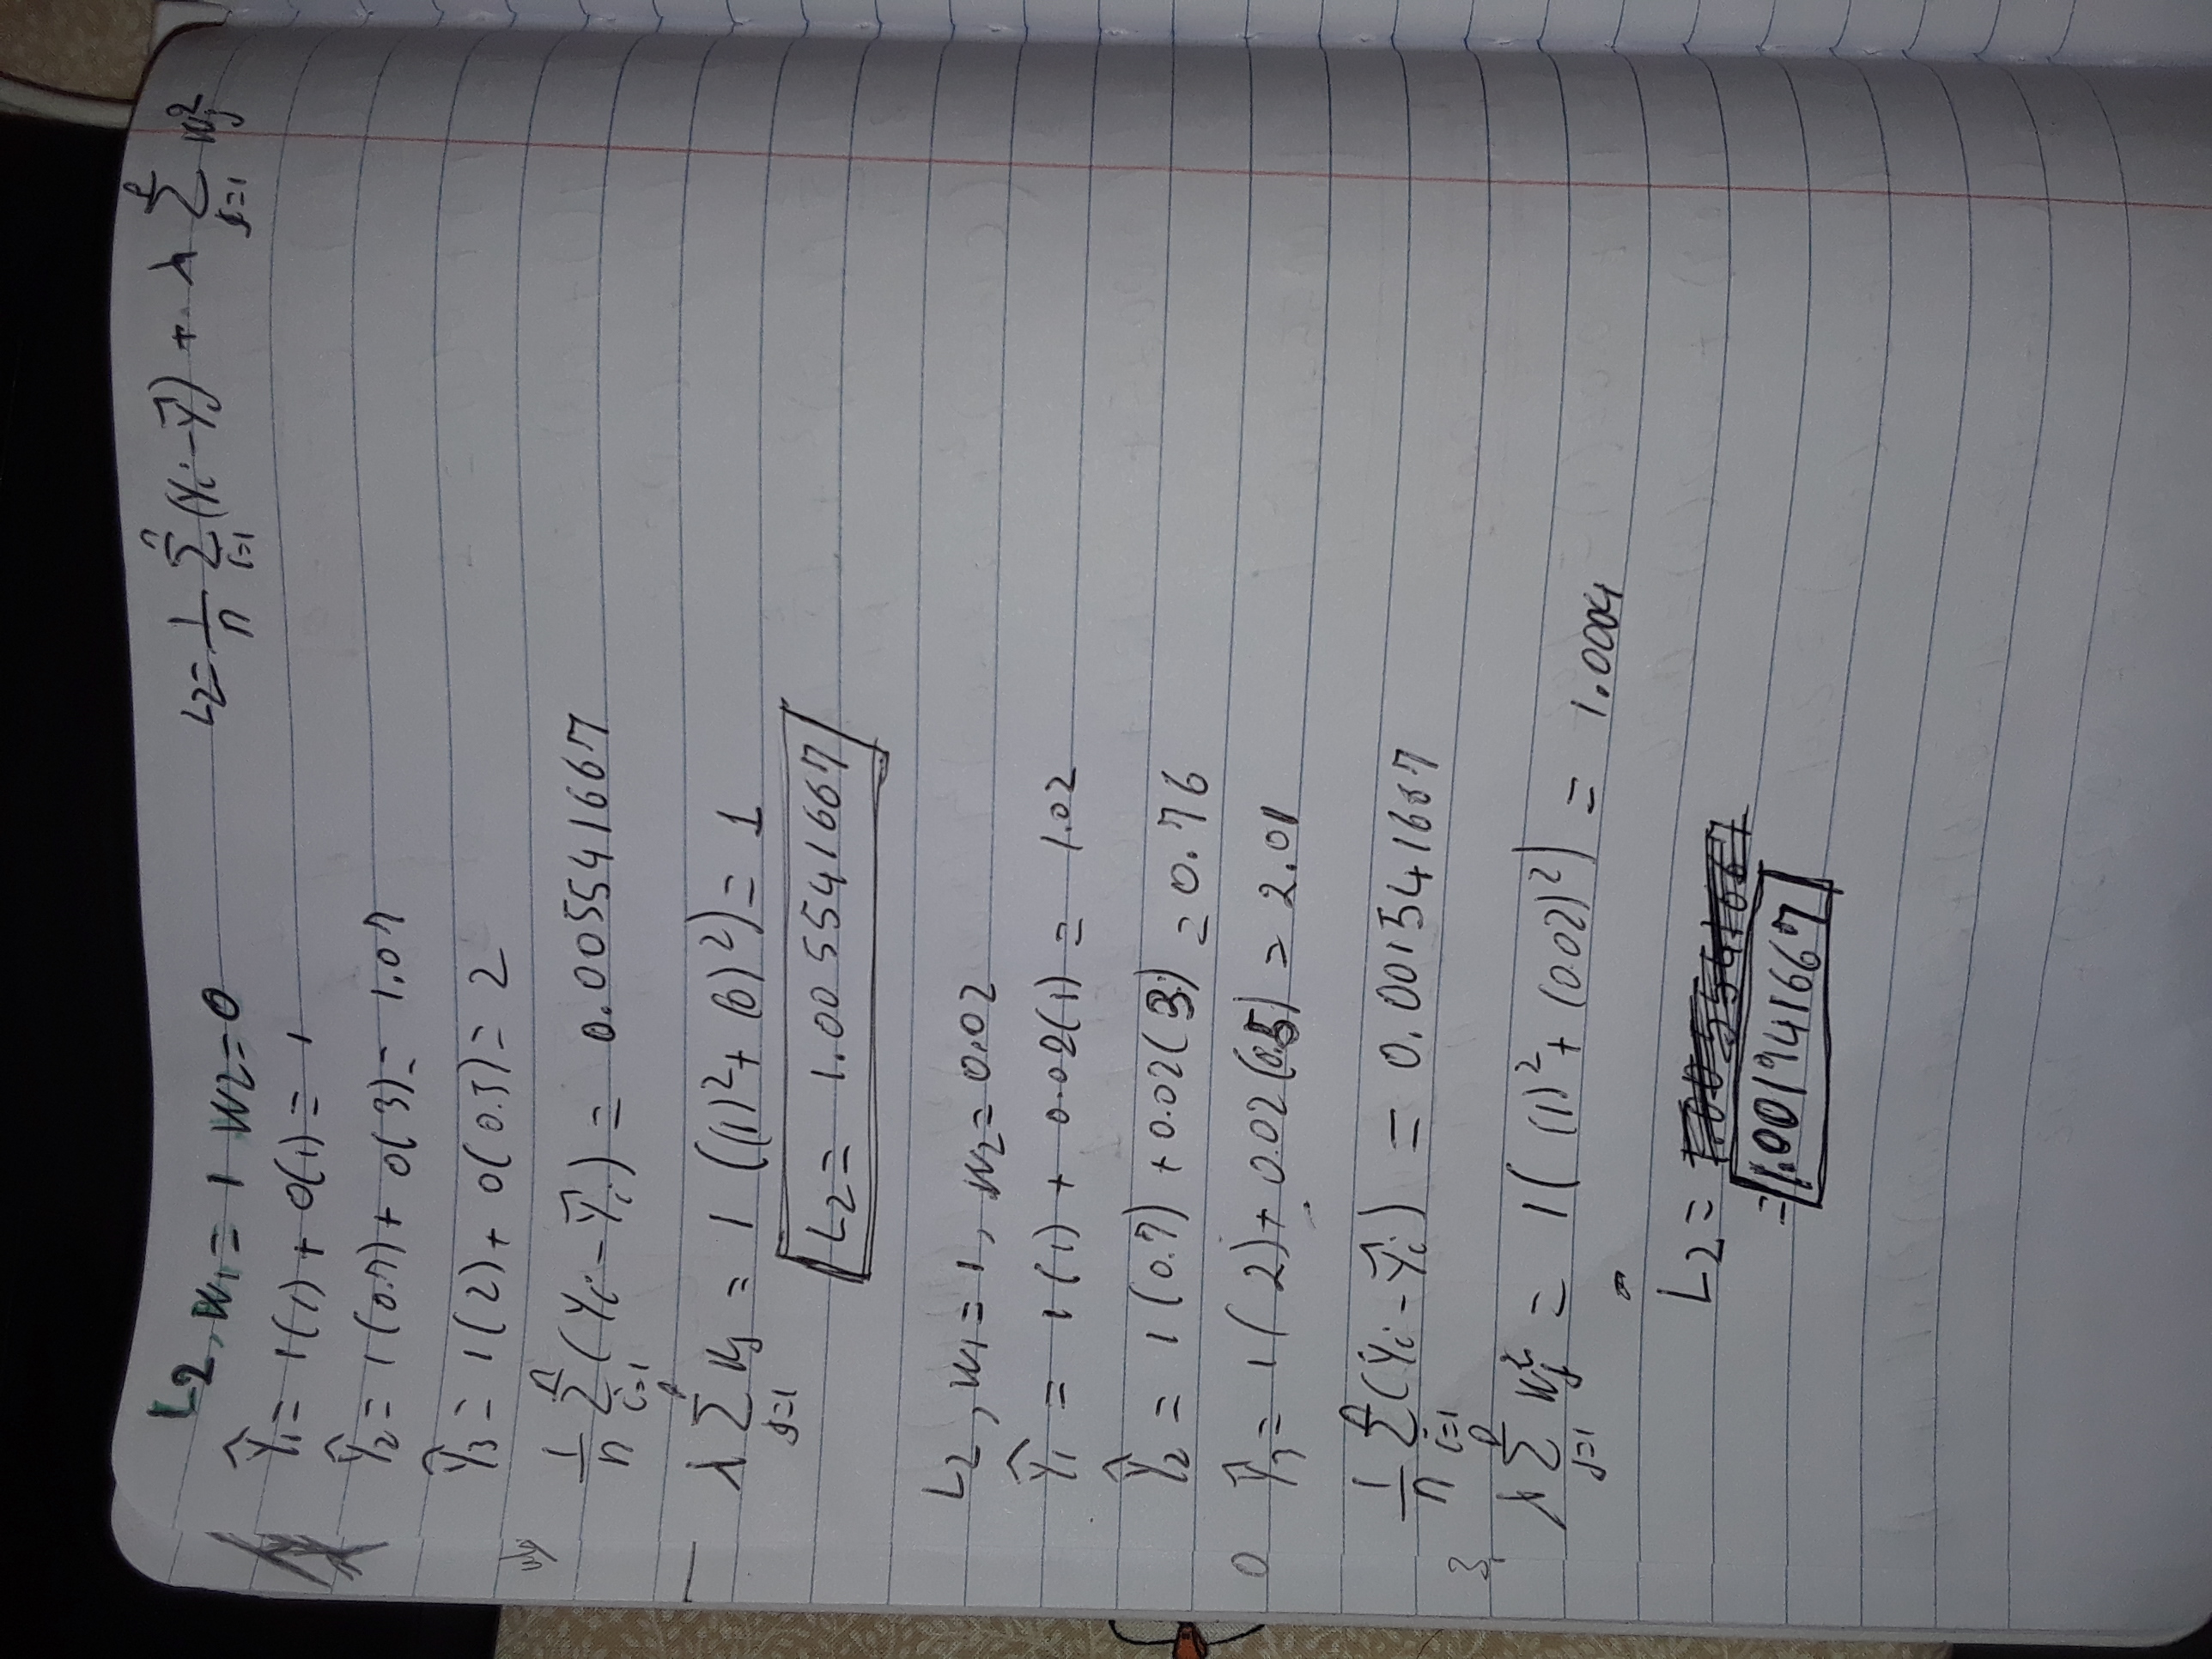

#### Answer 1(c)

*Check image for work*

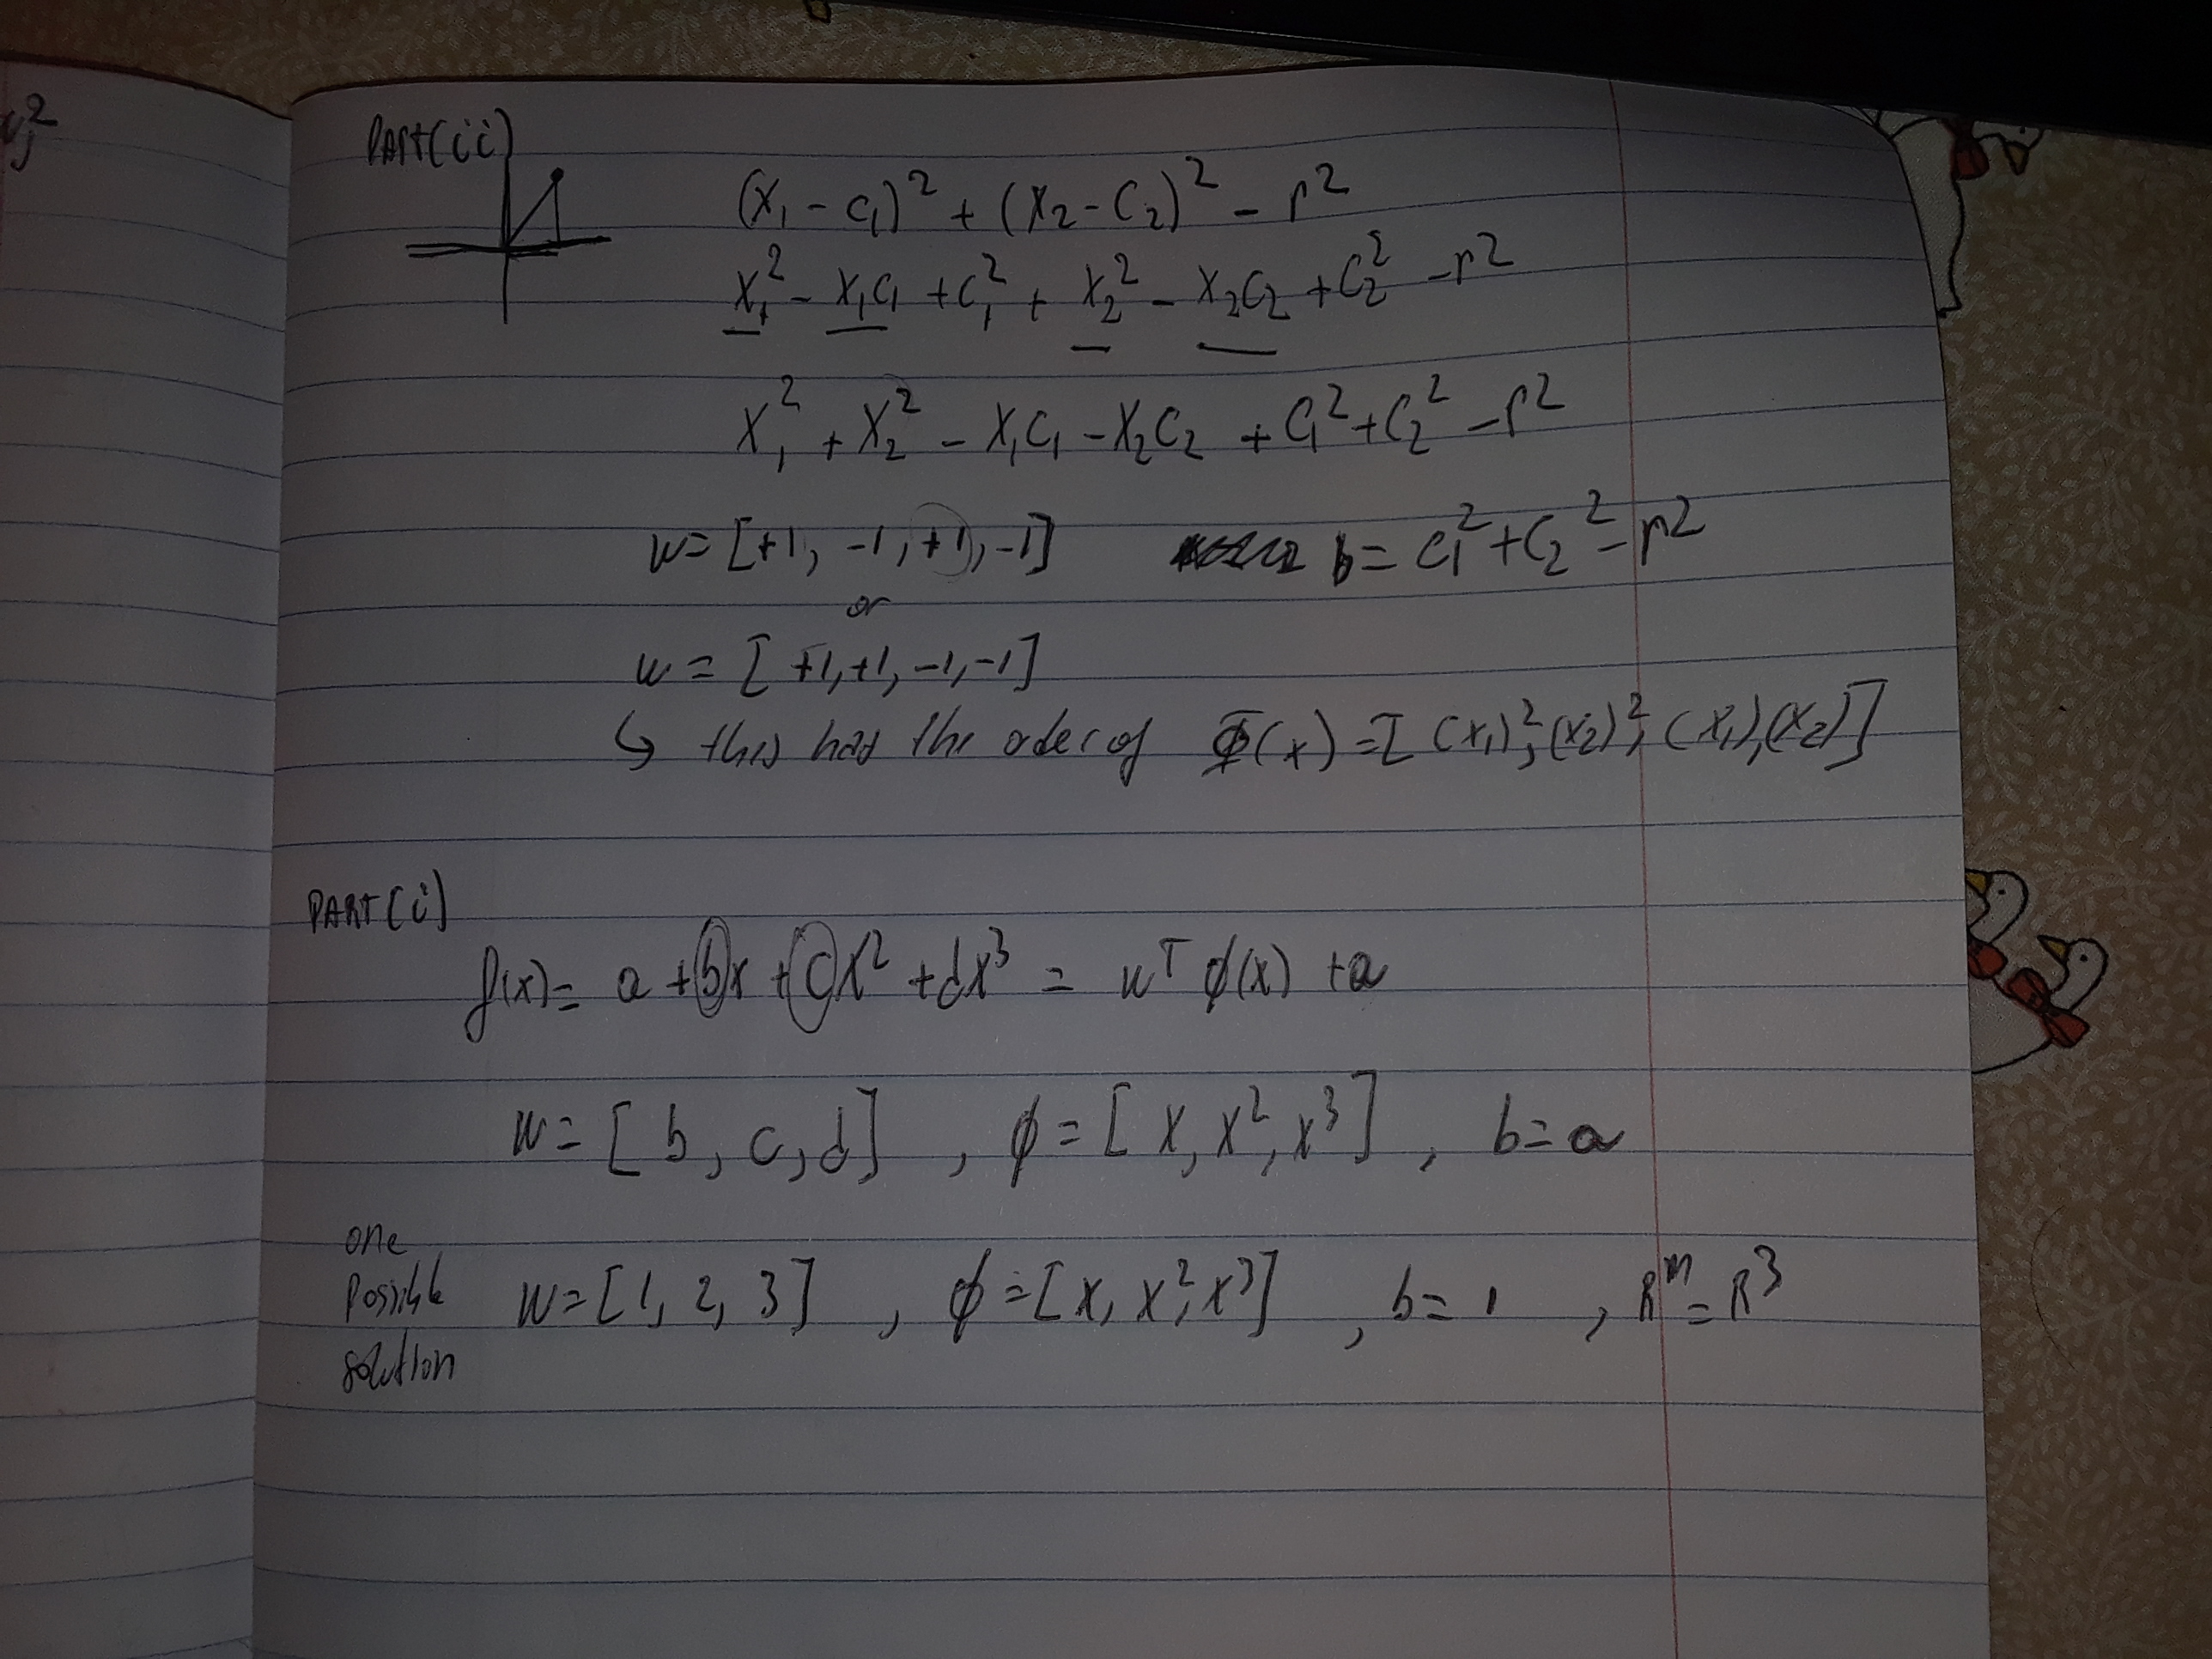

### Question 2 (20 points)



In this problem you will search for the best combination of parameters for 'SVC' among  `kernel`, `C`, and `gamma` for classification in the Breast Cancer Data and an accurate measure of the accuracy for the best set of parameters.  

Divide out a test set containing 20% of the data using random_state = 0.  Use `MinMaxScaler` if/when necessary for feature normalization. 


Please search the `kernel` from ('linear', 'rbf'), `C` from (0.1, 0.5, 1, 5, 10), `gamma` from (0.1, 0.5, 1, 5, 10). 

Please return the best hyper-parameters and the test score associated with the these hyper-parameters.

Be careful about the data leakage issues.  Make sure that the returned accuracy is an accurate estimate of the accuracy of the best parameters.  

*This function should a return a tuple with four numbers, i.e. `(best_kernel, best_C, best_gamma, test_score)`.*

In [65]:
import warnings
warnings.filterwarnings("ignore")

def load_data():
    import pandas as pd
    cancer = load_breast_cancer()

    d=pd.DataFrame(cancer.data) 
    d['target']= cancer.target
    col=cancer.feature_names.tolist()
    col.append('target')
    d.columns = col
    d.index = pd.RangeIndex(start=0, stop=569, step=1)
    df= pd.DataFrame(d)
    #Get X & y (predictor space & response)
    X=df.drop(['target'],axis=1)
    y= df['target']
    
    return X,y

def answer_two():
    from sklearn.datasets import load_breast_cancer
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.svm import SVC
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import cross_val_score
    import operator
    import numpy as np
    
    # Train/Test split 
    X,y =load_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.20)
    
    # Scale
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    scores = {}
    for this_kernel in ['linear', 'rbf']:
        for this_gamma in [0.1, 0.5, 1, 5, 10]:
            for this_C in [0.1, 0.5, 1, 5, 10]:
                clf = SVC(kernel=this_kernel, gamma=this_gamma, C=this_C)
                scores[(this_kernel, this_gamma, this_C)] = np.mean(cross_val_score(clf, X_train_scaled, y_train, cv=5))
    
    
    best_kernel, best_gamma, best_C = max(scores.items(), key=operator.itemgetter(1))[0]
    clf = SVC(kernel=best_kernel, gamma=best_gamma, C=best_C).fit(X_train_scaled, y_train)
    test_score= clf.score(X_test_scaled, y_test)
    
    return best_kernel, best_C, best_gamma, test_score

answer_two()

('rbf', 5, 0.5, 0.9824561403508771)

### Question 3 (20 points)

Suppose you have a dataset with some missing values and you know the values are not missing at random and the probability of missing is related to the values themselves. For example, people with higher
earnings may be less likely to reveal them. 

#### (a) (3 points) In this case, what would happen when imputing the missing values with the mean strategy?



#### Answer 3(a)

> Mean substitution leads to **bias** into our coefficients estimates.Usually, values that are imputed by a variable’s mean have a correlation of zero with other variable (biased toward zero). As a result, all the statistics that we might want to get (standard errrors, sd, variance,CI,...) will be biased. In our example, people with high earning income might not respond (want privacy), now if we go on and take the mean salary and assign this mean (which will most definetly be smaller than the actual high earning salary) to the missing observation, we will be getting a biased estimate of the salary that favors smaller values (because that is what the majority of people makes). In short, our final estimate of the mean income would be biased downwards.

In [66]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Please run this cell first before the question (b)
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()
d = {}
for i in range(len(cancer.feature_names)):
    d[cancer.feature_names[i]] = cancer.data[:, i]
d['target'] = cancer.target
df = pd.DataFrame(d)


X = df[['mean concave points', 'worst concave points']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print('The performance based on the full data: {:.3f}'.format(lr.score(X_test, y_test)))


rng = np.random.RandomState(0)

n_samples = X_train.shape[0]
X_train_missing = X_train.copy()
u = rng.uniform(low=0.3, high=1, size=(n_samples,))
X_train_missing[np.where(u < X_train[:, 0])[0], 0] = np.nan
u = rng.uniform(low=0.3, high=1, size=(n_samples,))
X_train_missing[np.where(u < X_train[:, 1])[0], 1] = np.nan

n_samples = X_test.shape[0]
X_test_missing = X_test.copy()
u = rng.uniform(low=0.3, high=1, size=(n_samples,))
X_test_missing[np.where(u < X_test[:, 0])[0], 0] = np.nan
u = rng.uniform(low=0.3, high=1, size=(n_samples,))
X_test_missing[np.where(u < X_test[:, 1])[0], 1] = np.nan


The performance based on the full data: 0.923


#### (b) (7 points) 

Please impute the missing values using `SimpleImputer` with `strategy='mean'`. Then fit a LogisticRegression with default hyper-parameters, and return the imputed data and the test score.


*This function should a return a tuple of two arrays and one number: `(X_train_imputed, X_test_imputed, test_score)`.*


In [7]:
def answer_three_b():
    from sklearn.impute import SimpleImputer
    from sklearn.linear_model import LogisticRegression
    
    #SimpleImputer
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    X_train_imputed = imp.fit_transform(X_train_missing)  
    X_test_imputed = imp.transform(X_test_missing)
    
    #Model
    lr = LogisticRegression()
    lr.fit(X_train_imputed, y_train)
    
    #Accuracy
    test_score= lr.score(X_test_imputed, y_test)
    
    return (X_train_imputed, X_test_imputed, test_score)

answer_three_b()

(array([[0.11332008, 0.31484671],
        [0.03768887, 0.06965208],
        [0.48663022, 0.56079917],
        [0.06153082, 0.17860834],
        [0.11466203, 0.30096452],
        [0.04218688, 0.1754392 ],
        [0.10377734, 0.19138822],
        [0.21824056, 0.3191526 ],
        [0.38757455, 0.51842921],
        [0.21744533, 0.33000244],
        [0.15666004, 0.49156045],
        [0.09701789, 0.19249053],
        [0.44875746, 0.55597658],
        [0.14632207, 0.25673441],
        [0.15333002, 0.45780227],
        [0.09120278, 0.12442301],
        [0.21115665, 0.73062349],
        [0.54821074, 0.33000244],
        [0.04242048, 0.13720289],
        [0.17957256, 0.53565277],
        [0.28508946, 0.59903548],
        [0.14289264, 0.29197382],
        [0.5417495 , 0.87599035],
        [0.29746521, 0.53599724],
        [0.21115665, 0.33000244],
        [0.18802187, 0.44230107],
        [0.12047714, 0.19338615],
        [0.06371769, 0.08832243],
        [0.09786282, 0.25597658],
        [0.088

#### (c) (5 points) 

Please impute the missing values using `SimpleImputer` with `strategy='mean'` and `add_indicator=True`. Then fit a LogisticRegression with default hyper-parameters, and return the imputed data and the test score.


*This function should a return a tuple of two arrays and one number: `(X_train_imputed, X_test_imputed, test_score)`.*

In [6]:
def answer_three_c():
    from sklearn.impute import SimpleImputer
    from sklearn.impute import MissingIndicator
    import numpy as np
    
    #SimpleImputer
    imp = SimpleImputer(missing_values=np.nan, strategy='mean',add_indicator=True)
    X_train_imputed = imp.fit_transform(X_train_missing)  
    X_test_imputed = imp.transform(X_test_missing)
    
    #Model
    lr = LogisticRegression()
    lr.fit(X_train_imputed, y_train)
    
    #Accuracy
    test_score = lr.score(X_test_imputed, y_test)

    return (X_train_imputed, X_test_imputed, test_score)

answer_three_c()

(array([[0.11332008, 0.31484671, 0.        , 0.        ],
        [0.03768887, 0.06965208, 0.        , 0.        ],
        [0.48663022, 0.56079917, 0.        , 0.        ],
        ...,
        [0.06988072, 0.17402687, 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.20402584, 0.33251808, 0.        , 0.        ]]),
 array([[0.21115665, 0.33000244, 1.        , 1.        ],
        [0.1027833 , 0.20685498, 0.        , 0.        ],
        [0.13180915, 0.28301757, 0.        , 0.        ],
        [0.06829026, 0.25938684, 0.        , 0.        ],
        [0.14527833, 0.17268343, 0.        , 0.        ],
        [0.12892644, 0.29424733, 0.        , 0.        ],
        [0.14801193, 0.33000244, 0.        , 1.        ],
        [0.05705765, 0.19776094, 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.10124254, 0.14033758, 0.        , 0.        ],
        [0.31312127, 0.38167413, 0.        , 0.        ],

#### (d) (5 points) 

Why are the additional indicators helpful when the missing values are missing not at random?

#### Answer 3(d)

>  An indicator attempts to incorporate the missing data patterns into the data analysis. The use of a missing indicator, combined with multiple imputation, reduces bias for missing non-random data.  For a better explanation, the Python docs tell us the following " If True, ... This allows a predictive estimator to account for missingness despite imputation. If a feature has no missing values at fit/train time, the feature won’t appear on the missing indicator even if there are missing values at transform/test time." In short, indicator recognizes that we might have MNAR data and esnure to account for this in the analysis (it flags the missingness of observations with a 1). As a result, our finall accuracy will be better and more robust. 